In [527]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [528]:
db = pd.read_csv("nba_shotchartdetail_2018-19.csv")
db.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,21800001,7,203496,Robert Covington,1610612755,Philadelphia 76ers,1,11,40,...,Center(C),24+ ft.,26,-53,264,1,0,20181016,BOS,PHI
1,Shot Chart Detail,21800001,10,1628369,Jayson Tatum,1610612738,Boston Celtics,1,11,15,...,Left Side Center(LC),24+ ft.,25,-148,207,1,0,20181016,BOS,PHI
2,Shot Chart Detail,21800001,14,1627759,Jaylen Brown,1610612738,Boston Celtics,1,11,3,...,Center(C),Less Than 8 ft.,1,4,18,1,0,20181016,BOS,PHI
3,Shot Chart Detail,21800001,17,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,10,55,...,Center(C),Less Than 8 ft.,0,-8,3,1,1,20181016,BOS,PHI
4,Shot Chart Detail,21800001,19,1628369,Jayson Tatum,1610612738,Boston Celtics,1,10,36,...,Center(C),Less Than 8 ft.,4,-46,1,1,0,20181016,BOS,PHI


In [529]:
db = db.drop(["GRID_TYPE", "GAME_EVENT_ID", "TEAM_ID", "SHOT_ATTEMPTED_FLAG"],1)
db.head()

,GAME_ID,PLAYER_ID,PLAYER_NAME,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,21800001,203496,Robert Covington,Philadelphia 76ers,1,11,40,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,-53,264,0,20181016,BOS,PHI
1,21800001,1628369,Jayson Tatum,Boston Celtics,1,11,15,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-148,207,0,20181016,BOS,PHI
2,21800001,1627759,Jaylen Brown,Boston Celtics,1,11,3,Missed Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,4,18,0,20181016,BOS,PHI
3,21800001,203954,Joel Embiid,Philadelphia 76ers,1,10,55,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-8,3,1,20181016,BOS,PHI
4,21800001,1628369,Jayson Tatum,Boston Celtics,1,10,36,Missed Shot,Driving Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-46,1,0,20181016,BOS,PHI


In [530]:
def hit():   
    return db[db["SHOT_MADE_FLAG"] == "1"]

def actiontype(actiontype):
    return db[db["ACTION_TYPE"] == actiontype]

In [531]:
def hitrate(playername):
    a = db[db['PLAYER_NAME'] == playername]
    return a.groupby('PLAYER_NAME').SHOT_MADE_FLAG.mean()

def hitrateShottype(playername, shottype):
    a = db[db['PLAYER_NAME'] == playername]
    b = a[db['SHOT_TYPE'] == shottype]
    return b.groupby('PLAYER_NAME').SHOT_MADE_FLAG.mean()

def hitrateShottype_Action(playername):
    a = db[db['PLAYER_NAME'] == playername]
    return a.groupby(['PLAYER_NAME', 'ACTION_TYPE','SHOT_TYPE']).SHOT_MADE_FLAG.mean()

hitrateShottype_Action ("Jayson Tatum")



PLAYER_NAME   ACTION_TYPE                         SHOT_TYPE     
Jayson Tatum  Alley Oop Dunk Shot                 2PT Field Goal    0.750000
              Cutting Dunk Shot                   2PT Field Goal    0.900000
              Cutting Finger Roll Layup Shot      2PT Field Goal    0.600000
              Cutting Layup Shot                  2PT Field Goal    0.714286
              Driving Dunk Shot                   2PT Field Goal    0.947368
              Driving Finger Roll Layup Shot      2PT Field Goal    0.586957
              Driving Floating Bank Jump Shot     2PT Field Goal    0.666667
              Driving Floating Jump Shot          2PT Field Goal    0.351351
              Driving Hook Shot                   2PT Field Goal    0.333333
              Driving Layup Shot                  2PT Field Goal    0.369048
              Driving Reverse Layup Shot          2PT Field Goal    0.500000
              Dunk Shot                           2PT Field Goal    0.833333
           

In [532]:
def hitrateTeam(teamname):
    a = db[db['TEAM_NAME'] == teamname]
    return a.groupby('TEAM_NAME').SHOT_MADE_FLAG.mean()

def hitrateTeamShottype(teamname, shottype):
    a = db[db['TEAM_NAME'] == teamname]
    b = a[db['SHOT_TYPE'] == shottype]
    return b.groupby('TEAM_NAME').SHOT_MADE_FLAG.mean()

hitrateTeamShottype("Boston Celtics", "3PT Field Goal")

TEAM_NAME
Boston Celtics    0.364793
Name: SHOT_MADE_FLAG, dtype: float64

In [533]:

def hitratebytime():
    a=(db["PERIOD"]*12)-db["MINUTES_REMAINING"]
    db.insert(7,"GAME_MINUTES_PLAYED", a)
    db1 = db[db['PERIOD'] <= 4]
    db2 = db[db['PERIOD'] > 4]
    b = (db2["PERIOD"]-4) * 5 - db2['MINUTES_REMAINING'] + 48
    db2 = db2.drop(['GAME_MINUTES_PLAYED'], 1)
    db2.insert(7,"GAME_MINUTES_PLAYED", b)
    dball = db1.append(db2)
    return dball.groupby("GAME_MINUTES_PLAYED").SHOT_MADE_FLAG.mean()

def hitratebytime_player(playername, time = 100):
    a=(db["PERIOD"]*12)-db["MINUTES_REMAINING"]
    db.insert(7,"GAME_MINUTES_PLAYED", a)
    db1 = db[db['PERIOD'] <= 4]
    db2 = db[db['PERIOD'] > 4]
    b = (db2["PERIOD"]-4) * 5 - db2['MINUTES_REMAINING'] + 48
    db2 = db2.drop(['GAME_MINUTES_PLAYED'], 1)
    db2.insert(7,"GAME_MINUTES_PLAYED", b)
    dball = db1.append(db2)
    dball = dball[dball['PLAYER_NAME'] == playername]
    if time != 100:
        dball = dball[dball['GAME_MINUTES_PLAYED'] == time]
    return dball.groupby("GAME_MINUTES_PLAYED").SHOT_MADE_FLAG.mean()

def hitratebytime_team(teamname, time = 100):
    a=(db["PERIOD"]*12)-db["MINUTES_REMAINING"]
    db.insert(7,"GAME_MINUTES_PLAYED", a)
    db1 = db[db['PERIOD'] <= 4]
    db2 = db[db['PERIOD'] > 4]
    b = (db2["PERIOD"]-4) * 5 - db2['MINUTES_REMAINING'] + 48
    db2 = db2.drop(['GAME_MINUTES_PLAYED'], 1)
    db2.insert(7,"GAME_MINUTES_PLAYED", b)
    dball = db1.append(db2)
    dball = dball[dball['TEAM_NAME'] == teamname]
    if time != 100:
        dball = dball[dball['GAME_MINUTES_PLAYED'] == time]
    return dball.groupby("GAME_MINUTES_PLAYED").SHOT_MADE_FLAG.mean()


In [534]:
def hitratebygame_team(teamname):
    a = db[db["TEAM_NAME"] == teamname]
    return a.groupby(['GAME_ID','HTM', 'VTM']).SHOT_MADE_FLAG.mean()

#hitratebygame_team("Boston Celtics")


<AxesSubplot:xlabel='GAME_ID,HTM,VTM'>

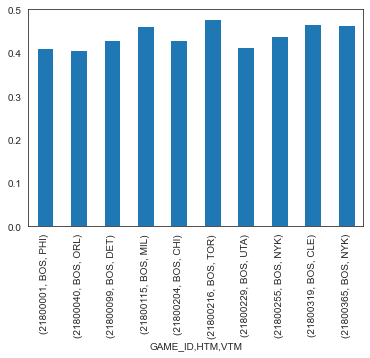

In [535]:
def hitratebygameHome():
    return db.groupby(['GAME_ID','HTM']).SHOT_MADE_FLAG.mean()

def hitratebygameAway():
    return db.groupby(['GAME_ID','VTM']).SHOT_MADE_FLAG.mean()

def hitratebyhomegame_team(team = "ab"):
    a = db
    if team != "ab":    
        a = db[db["HTM"] == team]
    return a.groupby(['GAME_ID','HTM', 'VTM']).SHOT_MADE_FLAG.mean()
#hitratebyhomegame_team("BOS")

def hitratebyawaygame_team(team = "ab"):
    a = db
    if team != "ab":
        a = db[db["VTM"] == team]
    return a.groupby(['GAME_ID','HTM', 'VTM']).SHOT_MADE_FLAG.mean()
hitratebyawaygame_team("BOS")

#display(hitratebyhomegame_team("BOS")[:10])
(hitratebyhomegame_team("BOS")[:10]).plot(kind="bar")

#display(hitratebyawaygame_team("BOS")[:10])
#(hitratebyawaygame_team("BOS")[:10]).plot(kind="bar")

In [536]:
import numpy as np

# Daten
import pandas as pd

# Visualisierung
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from pandas_profiling import ProfileReport
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

# Machine Learning und Pre-Processing
from sklearn.datasets import fetch_california_housing
#from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.preprocessing import minmax_scale, MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor


import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

#ProfileReport(db)

In [537]:
db.head()

,GAME_ID,PLAYER_ID,PLAYER_NAME,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,21800001,203496,Robert Covington,Philadelphia 76ers,1,11,40,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,-53,264,0,20181016,BOS,PHI
1,21800001,1628369,Jayson Tatum,Boston Celtics,1,11,15,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-148,207,0,20181016,BOS,PHI
2,21800001,1627759,Jaylen Brown,Boston Celtics,1,11,3,Missed Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,4,18,0,20181016,BOS,PHI
3,21800001,203954,Joel Embiid,Philadelphia 76ers,1,10,55,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-8,3,1,20181016,BOS,PHI
4,21800001,1628369,Jayson Tatum,Boston Celtics,1,10,36,Missed Shot,Driving Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-46,1,0,20181016,BOS,PHI


In [555]:
import mathplotlib.pyplot as plt
db['SHOT_MADE_FLAG'].plot()


ModuleNotFoundError: No module named 'mathplotlib'

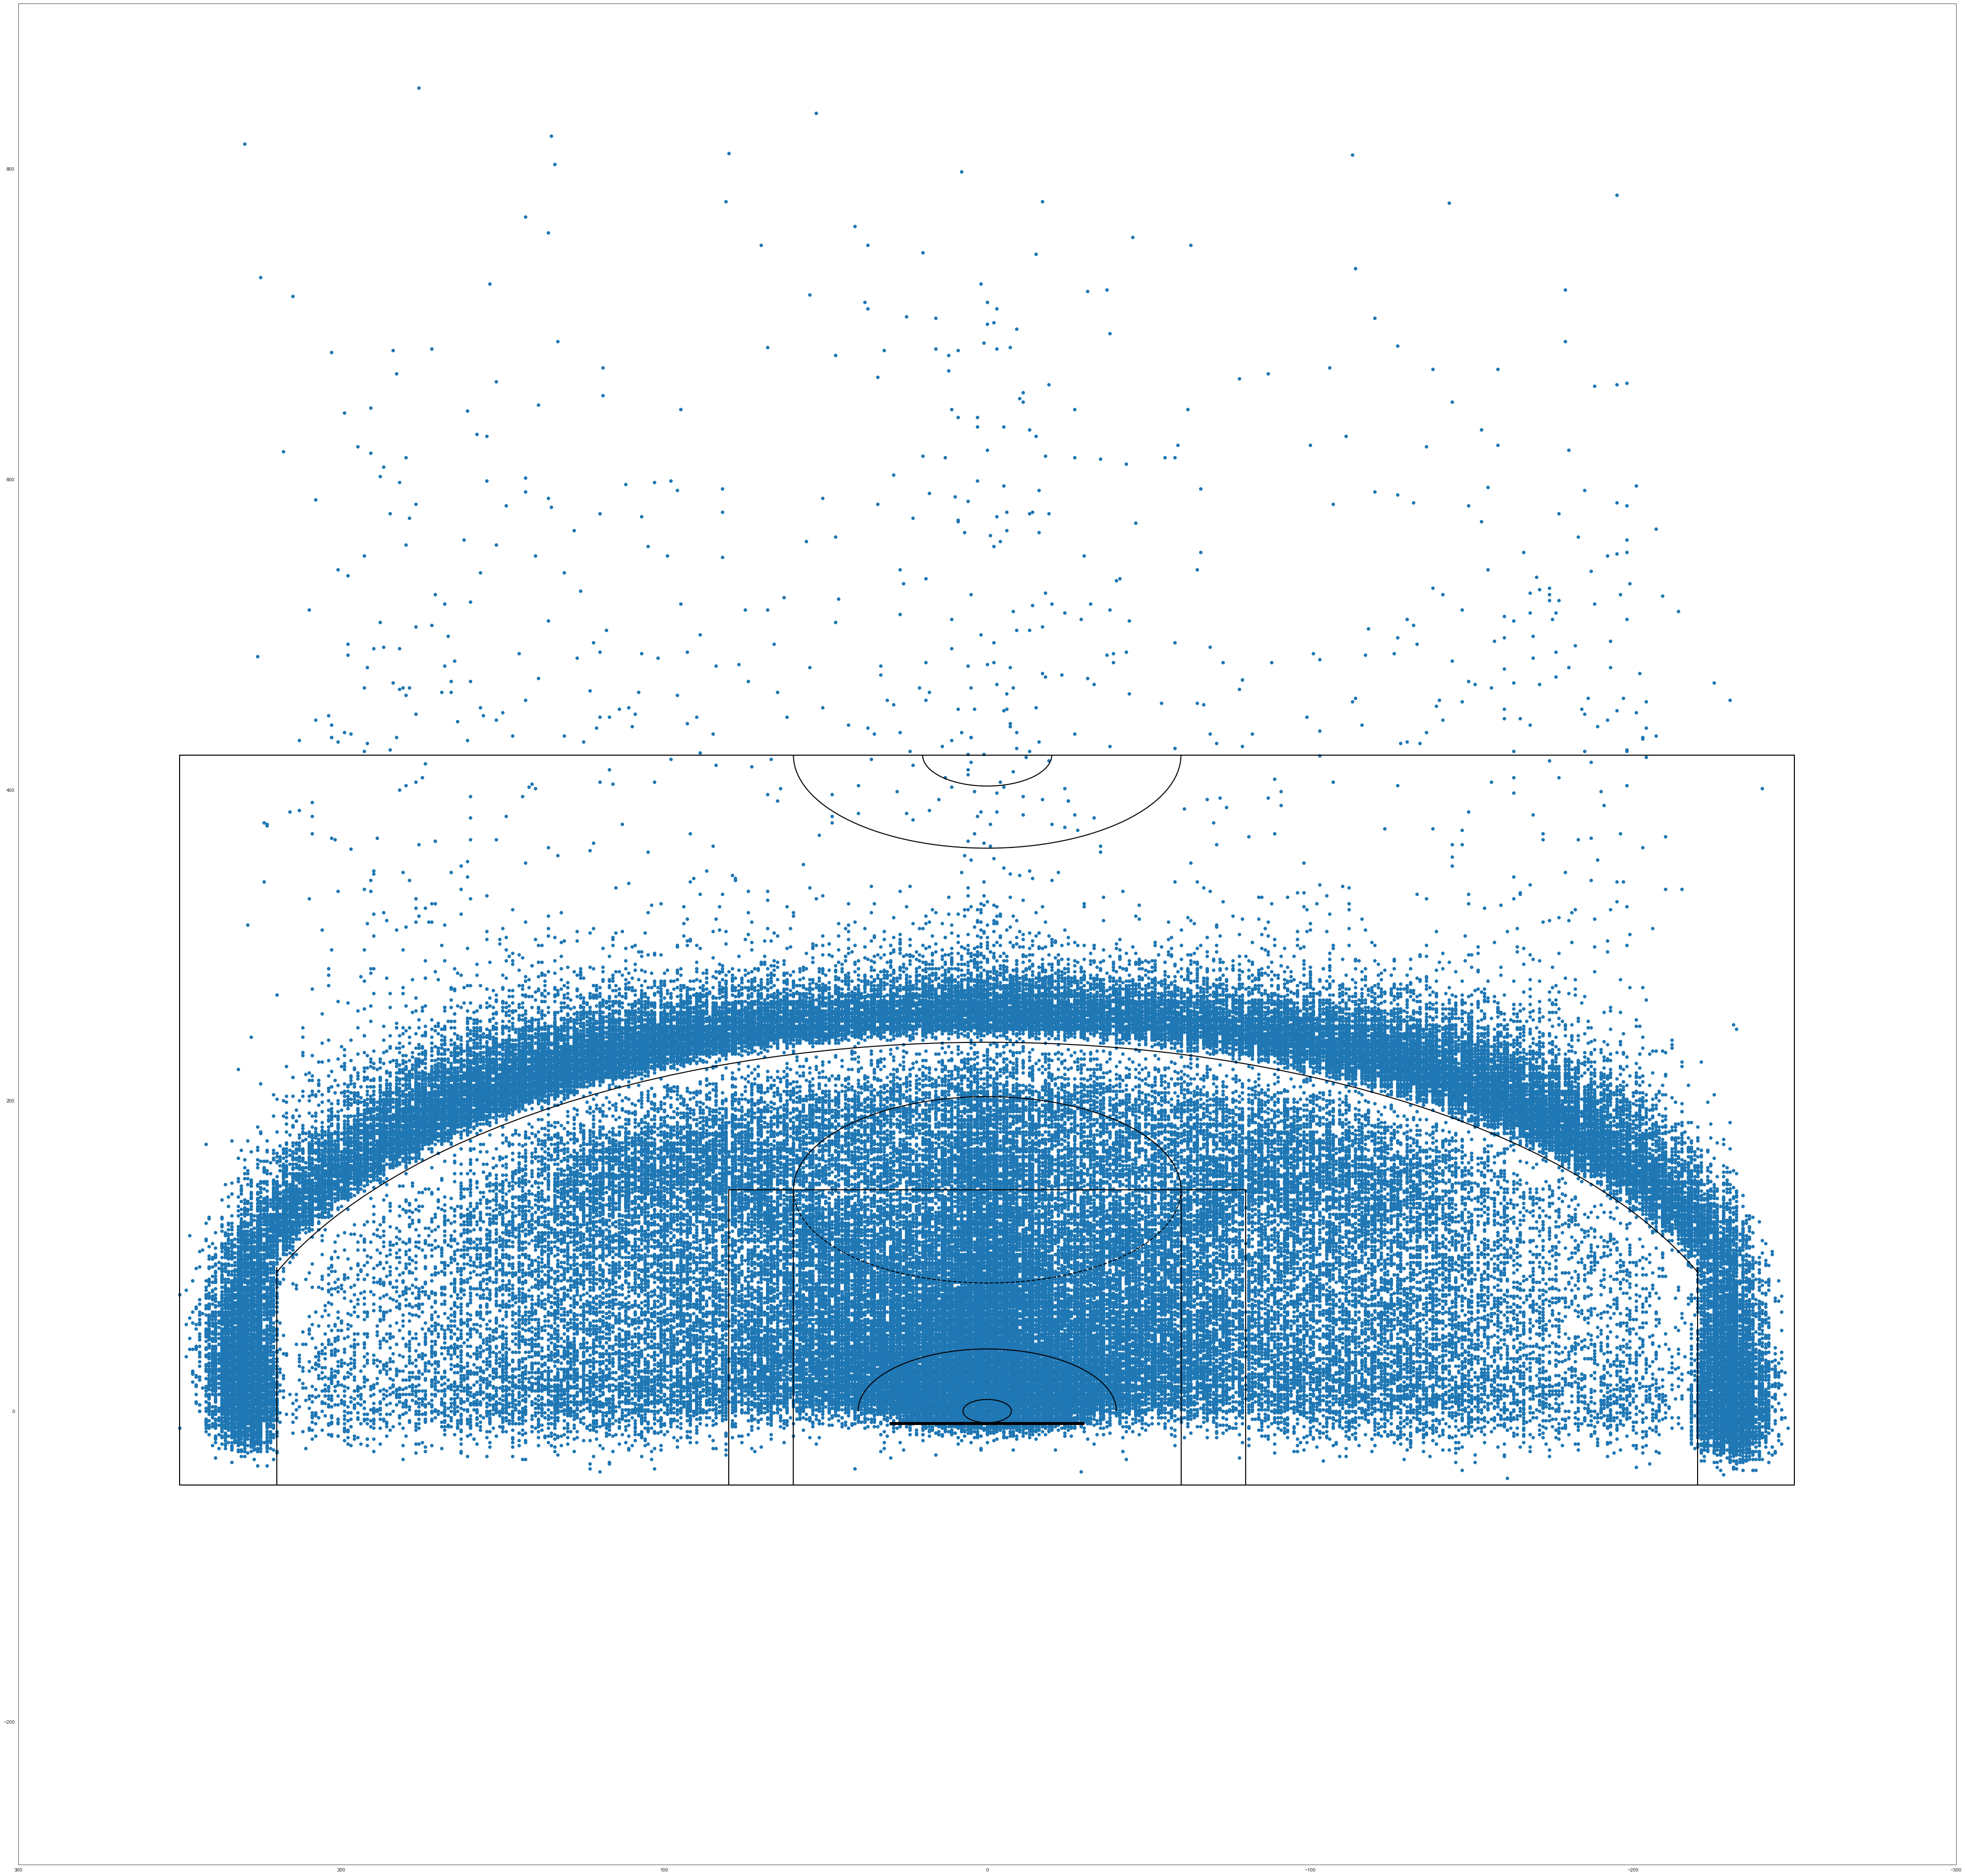

In [539]:
plt.figure(figsize=(70,69))
plt.scatter(db.LOC_X, db.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

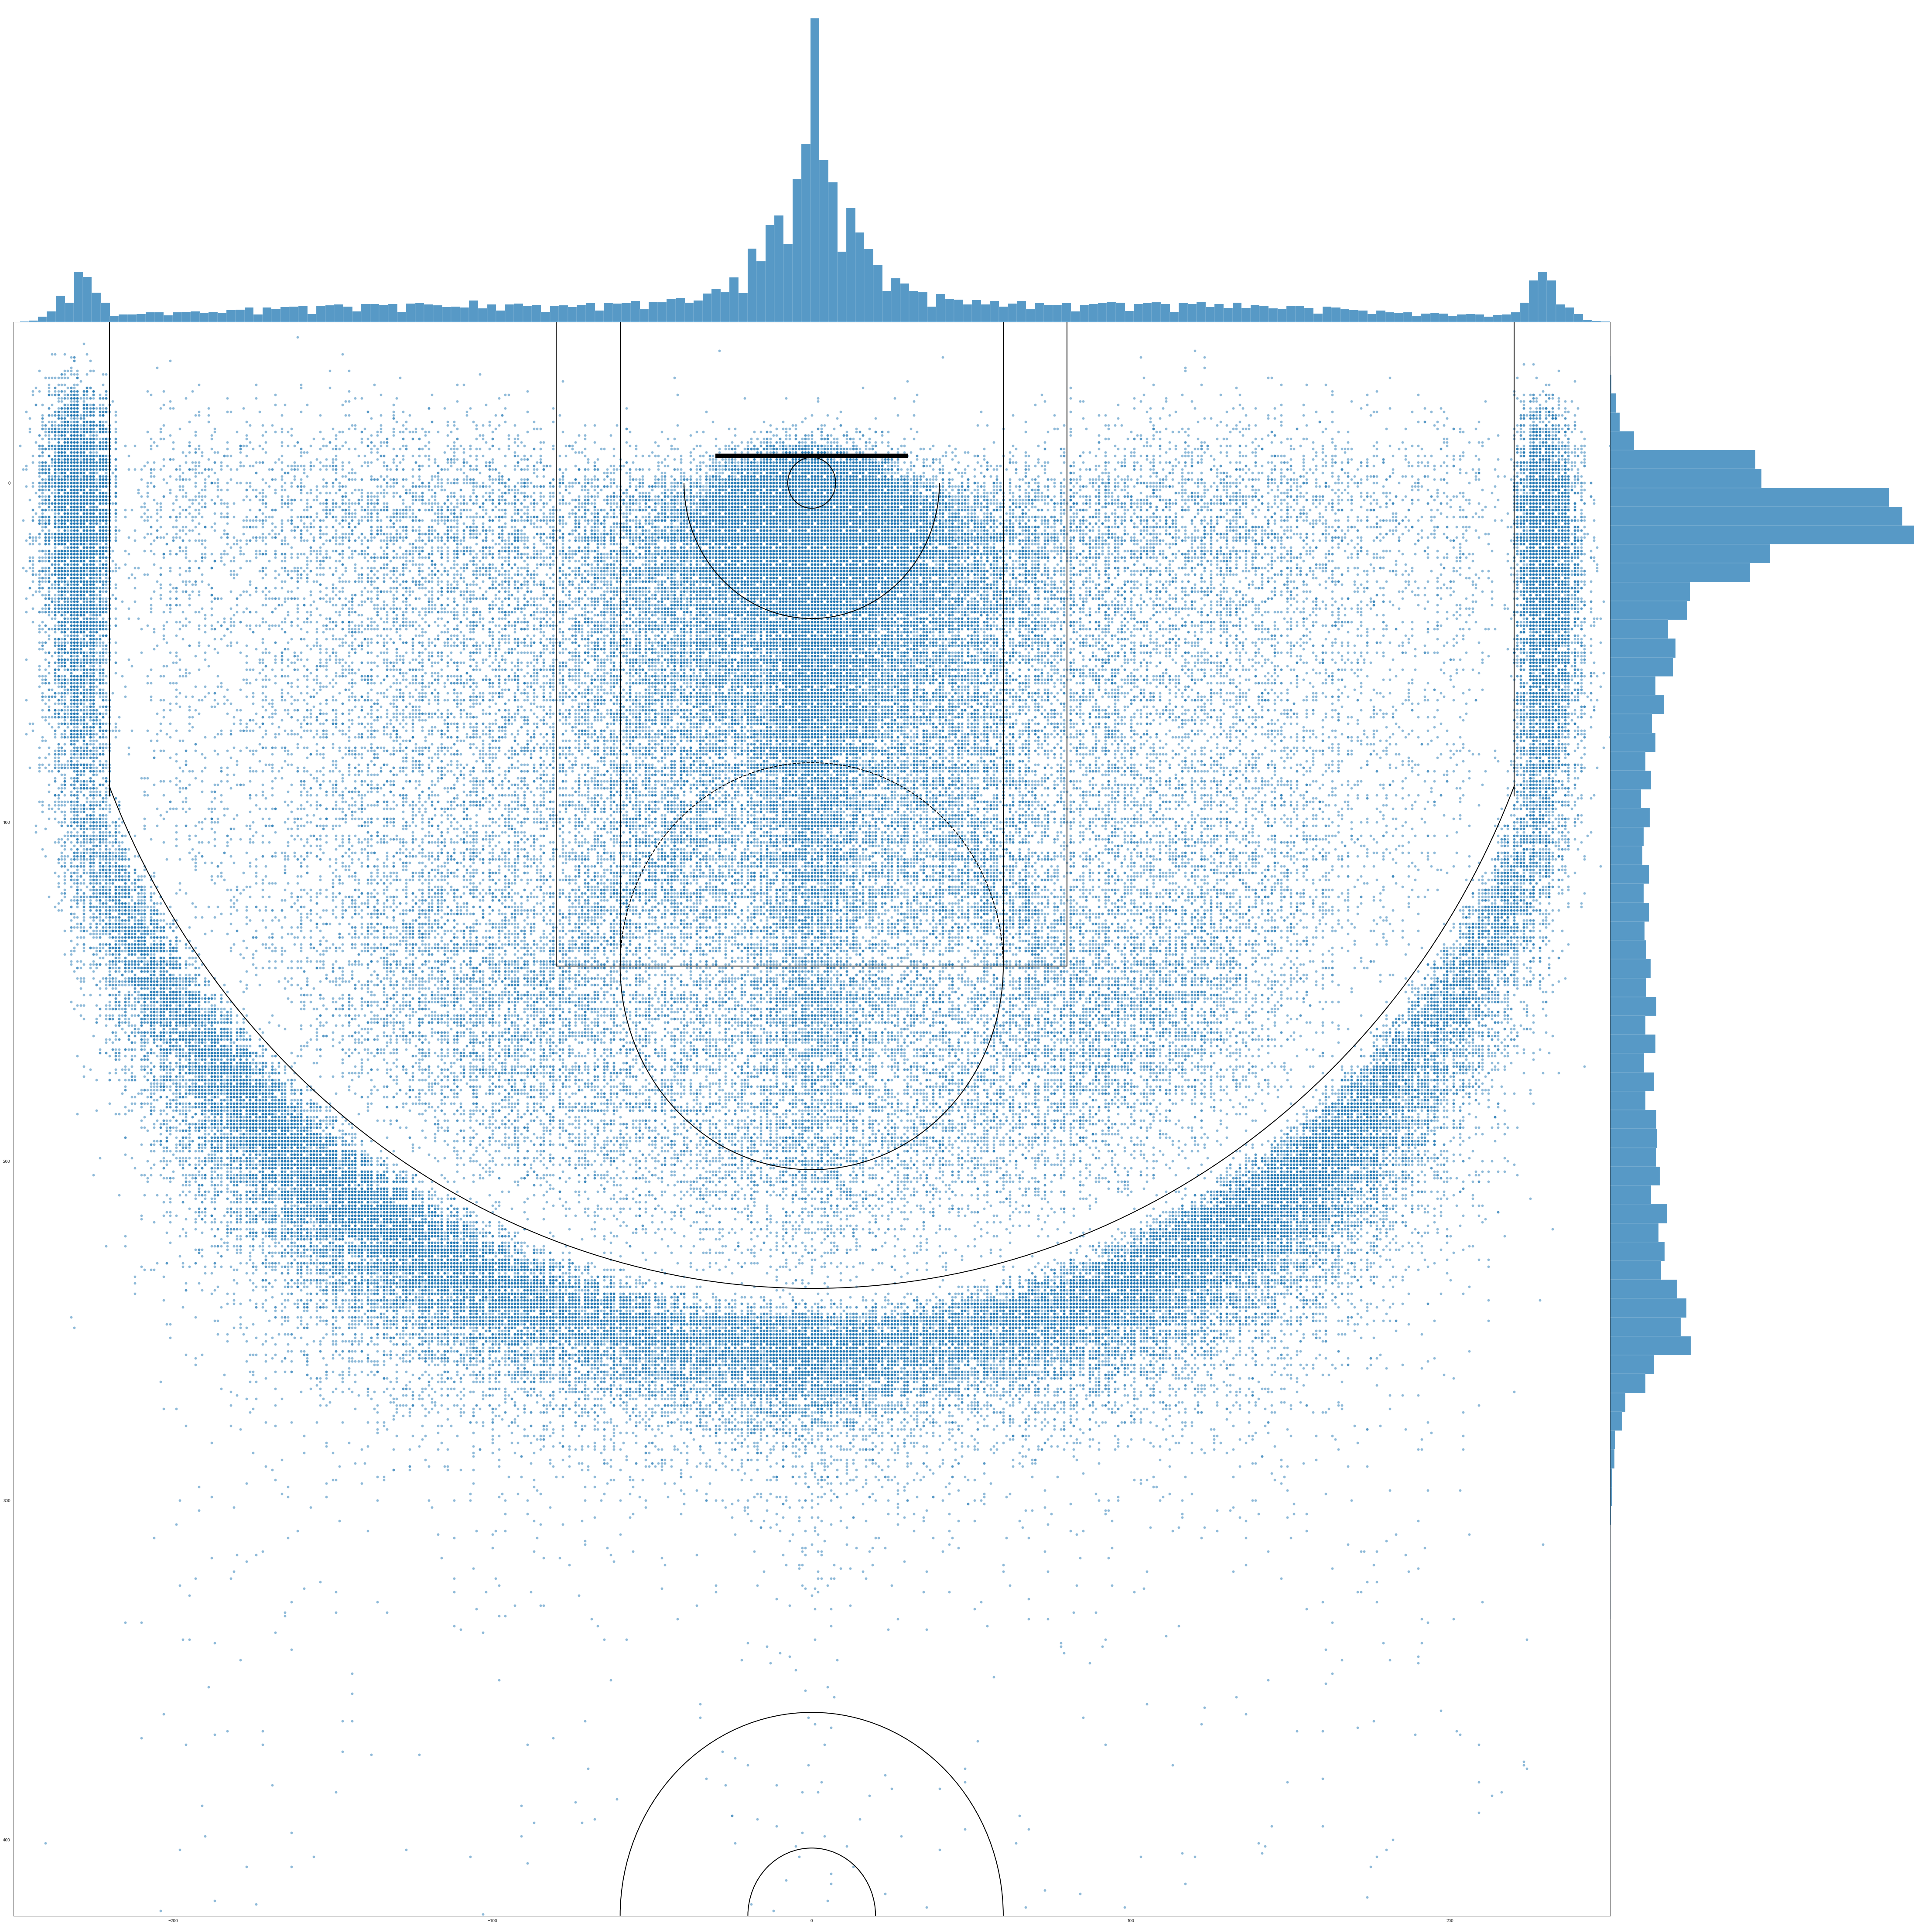

In [547]:
joint_shot_chart = sns.jointplot(db.LOC_X, db.LOC_Y,
                                 kind='scatter', space=0, alpha=0.5)

joint_shot_chart.fig.set_size_inches(70,69)

ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

plt.show()

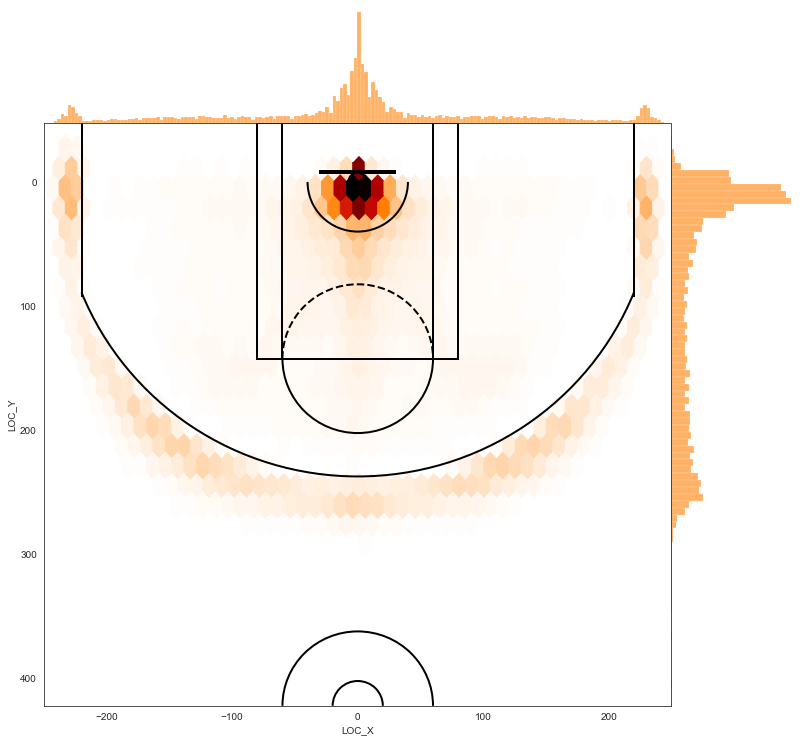

In [548]:
cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(db.LOC_X, db.LOC_Y,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
#ax.set_xlabel('')
#ax.set_ylabel('')
#ax.tick_params(labelbottom='off', labelleft='off')


plt.show()

In [551]:
from option_d import test_cm as viridis

# Register and set Viridis as the colormap for the plot
plt.register_cmap(cmap=viridis)
cmap = plt.get_cmap(viridis.name)

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(db.LOC_X, db.LOC_Y,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint, 
# It's the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, color="white", lw=1)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

plt.show()

ModuleNotFoundError: No module named 'option_d'